In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pickle

#graph hangul fonts
from matplotlib import font_manager, rc

rc('font', family='NanumGothic')

In [2]:
file_path = './dataset/'
names = ['Apple', 'Disney', 'HBO', 'Netflix', 'Paramount', 'Prime']

In [3]:
for name in names : 
    with open(file_path+name+"_titles.csv", 'rb') as f:
        df = pd.read_csv(f)
    globals()['{}_df'.format(name)] = df

In [4]:
isna = pd.DataFrame()
for name in names : 
    isna[name] = globals()['{}_df'.format(name)].isna().sum().to_frame()
    
print(isna)

                      Apple  Disney   HBO  Netflix  Paramount  Prime
id                        0       0     0        0          0      0
title                     0       0     0        0          0      0
type                      0       0     0        0          0      0
description               0       9     9       23         11    144
release_year              0       0     0        0          0      0
age_certification        11     451  1119     2743       1640   7185
runtime                   0       0     0        0          0      0
genres                    0       0     0        0          0      0
production_countries      0       0     0        0          0      0
seasons                  62    1314  2408     3831       2518   9322
imdb_id                   1     478   262      396        148    701
imdb_score                3     515   299      468        207   1108
imdb_votes                4     526   316      484        210   1120
tmdb_popularity           0      1

In [5]:
list(isna.loc['description'].to_numpy())

[0, 9, 9, 23, 11, 144]

In [6]:
ls = list()
for name in names : 
    ls.append(len(globals()['{}_df'.format(name)]))
print(ls)

[170, 1854, 3030, 6137, 3182, 10873]


In [7]:
print(list(isna.loc['description'].to_numpy() / np.array(ls)))

[0.0, 0.0048543689320388345, 0.0029702970297029703, 0.0037477594916082778, 0.0034569453174104338, 0.013243814954474386]


In [8]:
ls = list()
for name in names : 
    df = globals()['{}_df'.format(name)]
    temp = df[df.description.isna()]
    temp.insert(0, 'platform', [name for x in range(len(temp))])
    ls.append(temp)

missing_descriptions = pd.concat(ls)

In [9]:
missing_descriptions.head()

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1233,Disney,tm444463,Riina: le verità nascoste,MOVIE,NaN,2018,NaN,45,['documentation'],['IT'],NaN,tt20866762,NaN,NaN,0.840,8.0
1251,Disney,ts109332,Howie Mandel's Animals Doing Things,SHOW,NaN,2018,TV-14,33,['comedy'],['US'],2.0,tt8598154,3.6,65.0,NaN,NaN
1470,Disney,ts310121,World's Deadliest Snakes,SHOW,NaN,2020,NaN,44,['documentation'],['US'],1.0,NaN,NaN,NaN,1.400,NaN
1499,Disney,tm810892,Heroes of The Mediterranean,MOVIE,NaN,2019,NaN,44,['documentation'],['ES'],NaN,NaN,NaN,NaN,0.603,NaN
1508,Disney,tm1052946,My Music Story: Sukimaswitch,MOVIE,NaN,2020,NaN,81,"['documentation', 'music']",[],NaN,tt14287032,NaN,NaN,NaN,NaN


In [10]:
colors = ['black', '#113ccf', '#991EEB', '#D81F26', '#0164FF', '#00A8E1']

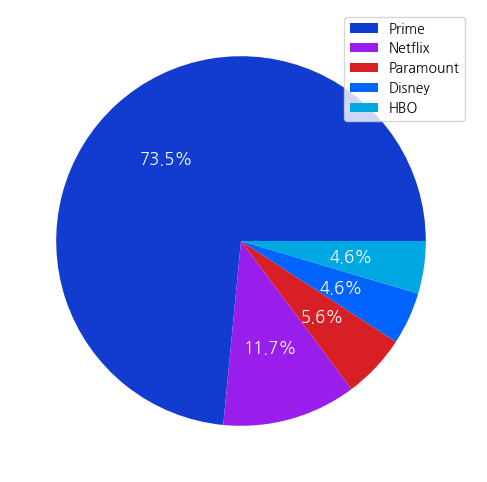

In [11]:
ratio = missing_descriptions['platform'].value_counts().to_frame()
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(ratio['platform'], labels = ratio.index, autopct = '%.1f%%', colors=colors[1:], 
        textprops={'color':'white', 'size':12})
plt.legend(ratio.index, loc='upper right')
plt.show()

In [12]:
missing_descriptions[missing_descriptions['id'].duplicated(keep=False)]

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
382,Paramount,tm74212,Frankie Darro & Mantan Moreland Collection (Up...,MOVIE,NaN,1940,NaN,62,"['comedy', 'music', 'romance', 'action']",['US'],NaN,tt0033214,5.7,345.0,1.319,5.5
595,Prime,tm74212,Frankie Darro & Mantan Moreland Collection (Up...,MOVIE,NaN,1940,NaN,62,"['comedy', 'music', 'romance', 'action']",['US'],NaN,tt0033214,5.7,345.0,1.319,5.5


In [13]:
df = pd.pivot_table(missing_descriptions, index='release_year', columns='platform', values='id', aggfunc='count')

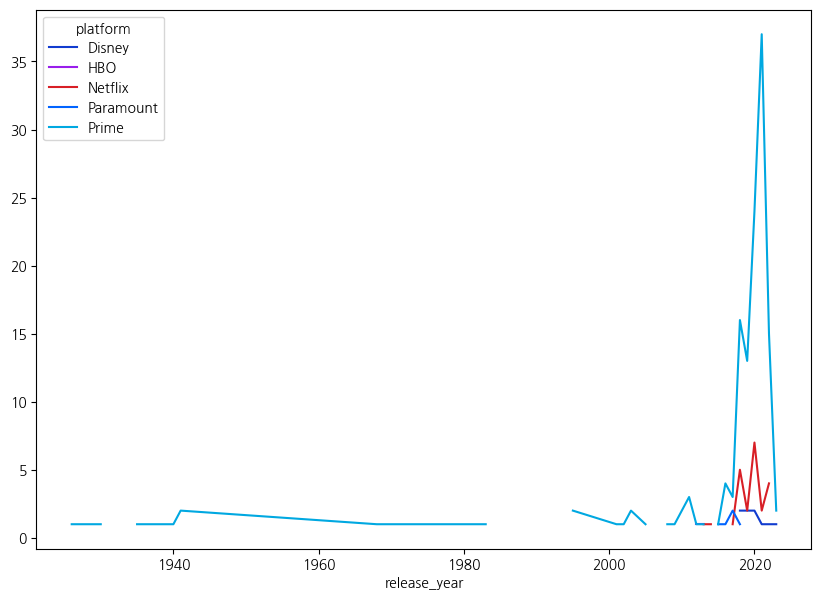

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))
df.plot(kind='line', color=colors[1:], ax=ax)
plt.show()

## 결론: description 빠진거 그냥 빼고 진행하자